In [51]:
# Import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [52]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [53]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [54]:
# Import citipy module.
from citipy import citipy

In [55]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [56]:
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [57]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=734c66e71b6a0a01011706587c11aee5


In [58]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [59]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | mugumu
Processing Record 3 of Set 1 | kaberamaido
Processing Record 4 of Set 1 | husavik
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | kaitangata
Processing Record 8 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | middelburg
Processing Record 11 of Set 1 | vestmannaeyjar
Processing Record 12 of Set 1 | aklavik
Processing Record 13 of Set 1 | vallenar
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | kavieng
Processing Record 16 of Set 1 | roma
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | dreux
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | arraial do cabo
Proces

Processing Record 39 of Set 4 | port hardy
Processing Record 40 of Set 4 | lautaro
Processing Record 41 of Set 4 | saint-augustin
Processing Record 42 of Set 4 | ballina
Processing Record 43 of Set 4 | cap malheureux
Processing Record 44 of Set 4 | caucaia
Processing Record 45 of Set 4 | thompson
Processing Record 46 of Set 4 | beloha
Processing Record 47 of Set 4 | uruzgan
Processing Record 48 of Set 4 | rizhao
Processing Record 49 of Set 4 | vuktyl
Processing Record 50 of Set 4 | zheleznodorozhnyy
Processing Record 1 of Set 5 | consett
Processing Record 2 of Set 5 | saskylakh
Processing Record 3 of Set 5 | necochea
Processing Record 4 of Set 5 | kirensk
Processing Record 5 of Set 5 | ambodifototra
City not found. Skipping...
Processing Record 6 of Set 5 | lower hutt
Processing Record 7 of Set 5 | port macquarie
Processing Record 8 of Set 5 | jasper
Processing Record 9 of Set 5 | mahebourg
Processing Record 10 of Set 5 | faanui
Processing Record 11 of Set 5 | sarangani
Processing Reco

Processing Record 29 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 30 of Set 8 | richards bay
Processing Record 31 of Set 8 | nicoya
Processing Record 32 of Set 8 | fuerte olimpo
Processing Record 33 of Set 8 | lerwick
Processing Record 34 of Set 8 | castelnaudary
Processing Record 35 of Set 8 | ronchi dei legionari
Processing Record 36 of Set 8 | muravlenko
Processing Record 37 of Set 8 | nara
Processing Record 38 of Set 8 | yumen
Processing Record 39 of Set 8 | solsvik
City not found. Skipping...
Processing Record 40 of Set 8 | hay river
Processing Record 41 of Set 8 | zhigansk
Processing Record 42 of Set 8 | kyshtovka
Processing Record 43 of Set 8 | constitucion
Processing Record 44 of Set 8 | ola
Processing Record 45 of Set 8 | gampola
Processing Record 46 of Set 8 | norman wells
Processing Record 47 of Set 8 | georgetown
Processing Record 48 of Set 8 | kuchinarai
Processing Record 49 of Set 8 | harper
Processing Record 50 of Set 8 | sinnamary
Processing Rec

Processing Record 13 of Set 12 | huilong
Processing Record 14 of Set 12 | cockburn town
Processing Record 15 of Set 12 | daru
Processing Record 16 of Set 12 | nyurba
Processing Record 17 of Set 12 | kvarkeno
Processing Record 18 of Set 12 | liuzhou
Processing Record 19 of Set 12 | zhireken
Processing Record 20 of Set 12 | copiapo
Processing Record 21 of Set 12 | krasnyy chikoy
Processing Record 22 of Set 12 | nizhnevartovsk
Processing Record 23 of Set 12 | anadyr
Processing Record 24 of Set 12 | tongsa
City not found. Skipping...
Processing Record 25 of Set 12 | meulaboh
Processing Record 26 of Set 12 | hargeysa
Processing Record 27 of Set 12 | asau
Processing Record 28 of Set 12 | nguiu
City not found. Skipping...
Processing Record 29 of Set 12 | deer lake
Processing Record 30 of Set 12 | dumingag
Processing Record 31 of Set 12 | hermiston
Processing Record 32 of Set 12 | nanyamba
Processing Record 33 of Set 12 | moindou
Processing Record 34 of Set 12 | beyneu
Processing Record 35 of 

In [60]:
len(city_data)

567

In [61]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,67.08,30,3,8.10,ZA,2021-04-18 05:03:01
1,Mugumu,-1.8500,34.7000,63.10,82,88,6.13,TZ,2021-04-18 05:03:01
2,Kaberamaido,1.7389,33.1594,70.48,83,77,2.35,UG,2021-04-18 05:03:02
3,Husavik,66.0449,-17.3389,35.60,93,75,2.95,IS,2021-04-18 05:03:02
4,Butaritari,3.0707,172.7902,82.17,77,99,9.26,KI,2021-04-18 05:03:02
5,Kaitangata,-46.2817,169.8464,57.54,72,62,7.36,NZ,2021-04-18 05:03:03
6,Puerto Ayora,-0.7393,-90.3518,75.00,100,76,3.27,EC,2021-04-18 05:00:31
7,Middelburg,-25.7751,29.4648,50.25,86,4,2.06,ZA,2021-04-18 05:03:03
8,Vestmannaeyjar,63.4427,-20.2734,39.42,61,100,21.47,IS,2021-04-18 05:03:04
9,Aklavik,68.2191,-135.0107,41.00,48,87,3.44,CA,2021-04-18 05:03:04


In [85]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, 
# and Wind Speed, so they are easy to read.

new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng',
                   'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2021-04-18 05:03:01,-33.5906,26.8910,67.08,30,3,8.10
1,Mugumu,TZ,2021-04-18 05:03:01,-1.8500,34.7000,63.10,82,88,6.13
2,Kaberamaido,UG,2021-04-18 05:03:02,1.7389,33.1594,70.48,83,77,2.35
3,Husavik,IS,2021-04-18 05:03:02,66.0449,-17.3389,35.60,93,75,2.95
4,Butaritari,KI,2021-04-18 05:03:02,3.0707,172.7902,82.17,77,99,9.26
5,Kaitangata,NZ,2021-04-18 05:03:03,-46.2817,169.8464,57.54,72,62,7.36
6,Puerto Ayora,EC,2021-04-18 05:00:31,-0.7393,-90.3518,75.00,100,76,3.27
7,Middelburg,ZA,2021-04-18 05:03:03,-25.7751,29.4648,50.25,86,4,2.06
8,Vestmannaeyjar,IS,2021-04-18 05:03:04,63.4427,-20.2734,39.42,61,100,21.47
9,Aklavik,CA,2021-04-18 05:03:04,68.2191,-135.0107,41.00,48,87,3.44


In [86]:
# Create the output file (CSV).
output_data_file = 'weather_data/cities.csv'
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [87]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

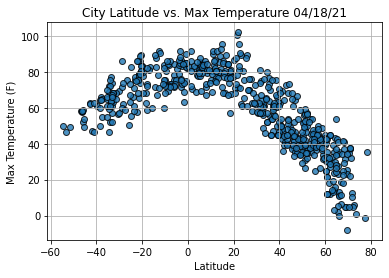

In [88]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

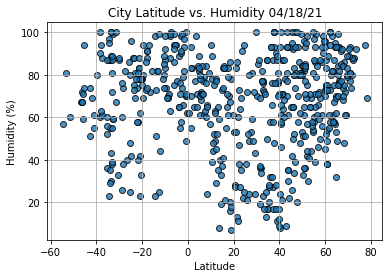

In [89]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

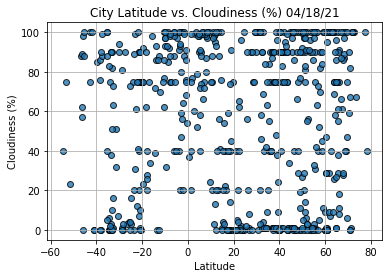

In [90]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

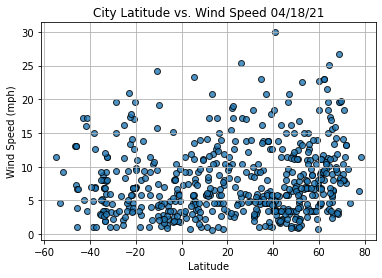

In [91]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [130]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [131]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

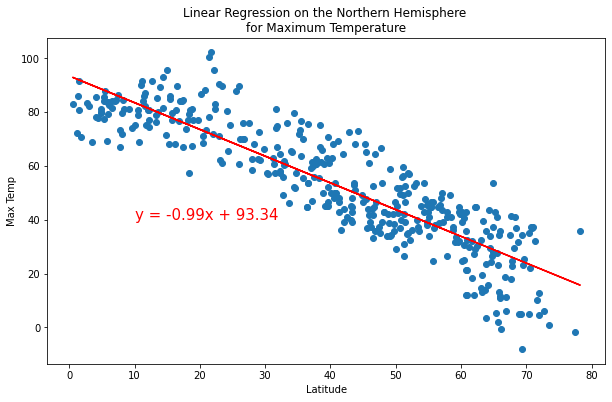

LinregressResult(slope=-0.9923951881874487, intercept=93.33958846168582, rvalue=-0.8852431970941753, pvalue=1.0335413707909722e-133, stderr=0.026202779985583912)

In [185]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plt.subplots(figsize=(10, 6))
plt.title('Linear Regression on the Northern Hemisphere \n'
          f'for Maximum Temperature')
# Call the function.
plot_linear_regression(x_values, y_values, _, 'Max Temp',(10,40))

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

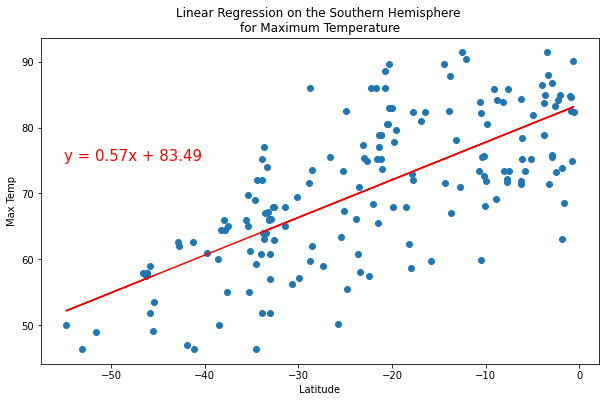

LinregressResult(slope=0.5709009894657681, intercept=83.48728357637131, rvalue=0.7003009397495431, pvalue=3.1199621226796866e-26, stderr=0.04503222846609364)

In [191]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plt.subplots(figsize=(10, 6))
plt.title('Linear Regression on the Southern Hemisphere \n'
          f'for Maximum Temperature')
# Call the function.
plot_linear_regression(x_values, y_values, _, 'Max Temp',(-55,75))
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

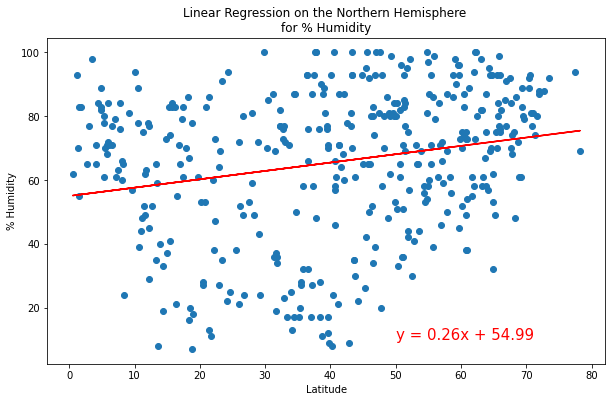

LinregressResult(slope=0.26198174834682103, intercept=54.98563044370017, rvalue=0.22453010863445744, pvalue=6.092487667006119e-06, stderr=0.057136819365485016)

In [192]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plt.subplots(figsize=(10, 6))
plt.title('Linear Regression on the Northern Hemisphere \n'
          f'for % Humidity')
# Call the function.
plot_linear_regression(x_values, y_values, _, '% Humidity',(50,10))

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

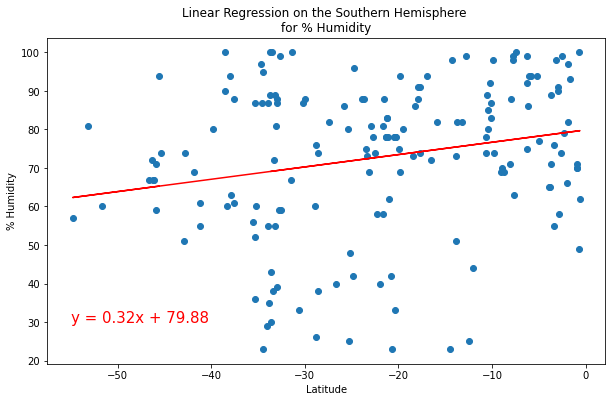

LinregressResult(slope=0.32030453607570897, intercept=79.8847252671159, rvalue=0.22226667355664384, pvalue=0.0036790758874036262, stderr=0.10872485656786993)

In [193]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plt.subplots(figsize=(10, 6))
plt.title('Linear Regression on the Southern Hemisphere \n'
          f'for % Humidity')
# Call the function.
plot_linear_regression(x_values, y_values, _, '% Humidity',(-55,30))

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

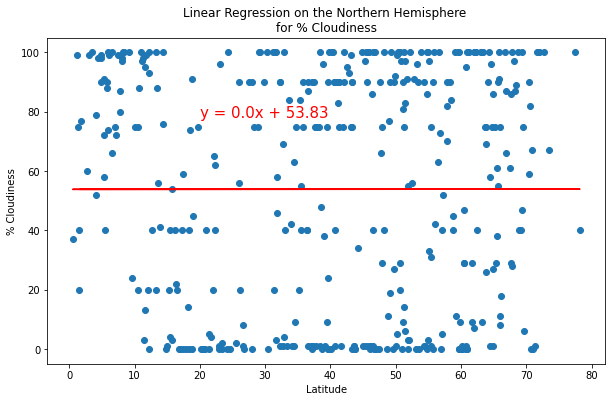

LinregressResult(slope=0.000654118931211611, intercept=53.83278060546158, rvalue=0.00033152083143177377, pvalue=0.9947395709494835, stderr=0.09915126940567467)

In [194]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plt.subplots(figsize=(10, 6))
plt.title('Linear Regression on the Northern Hemisphere \n'
          f'for % Cloudiness')
# Call the function.
plot_linear_regression(x_values, y_values, _, '% Cloudiness',(20,78))

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

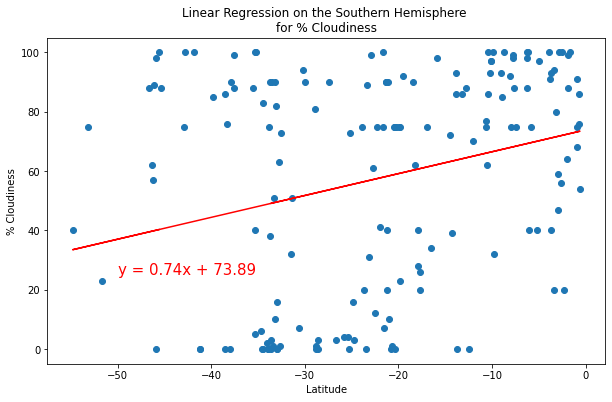

LinregressResult(slope=0.7373890151600961, intercept=73.88555328908959, rvalue=0.27267035897362507, pvalue=0.00033500197575877204, stderr=0.20133723787208463)

In [195]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plt.subplots(figsize=(10, 6))
plt.title('Linear Regression on the Southern Hemisphere \n'
          f'for % Cloudiness')
# Call the function.
plot_linear_regression(x_values, y_values, _, '% Cloudiness',(-50,25))

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

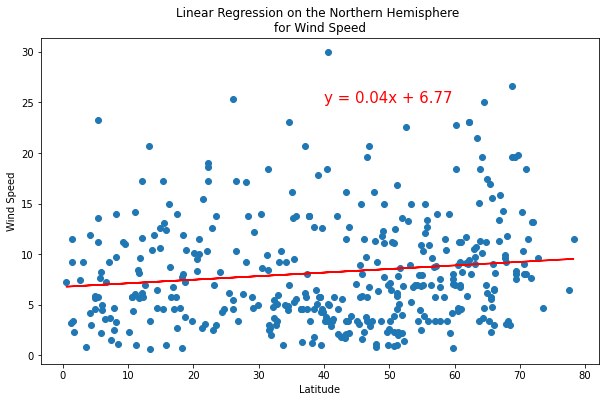

LinregressResult(slope=0.0353112359144655, intercept=6.768294596624525, rvalue=0.13221602359462542, pvalue=0.008265954372192059, stderr=0.013303064464892706)

In [198]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plt.subplots(figsize=(10, 6))
plt.title('Linear Regression on the Northern Hemisphere \n'
          f'for Wind Speed')
# Call the function.
plot_linear_regression(x_values, y_values, _, 'Wind Speed',(40,25))

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

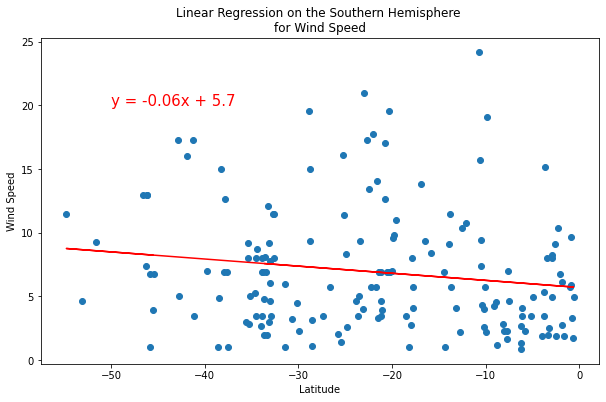

LinregressResult(slope=-0.05588170135570331, intercept=5.70043572744023, rvalue=-0.16061950624207721, pvalue=0.036967688102402946, stderr=0.026572809058204815)

In [200]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plt.subplots(figsize=(10, 6))
plt.title('Linear Regression on the Southern Hemisphere \n'
          f'for Wind Speed')
# Call the function.
plot_linear_regression(x_values, y_values, _, 'Wind Speed',(-50,20))

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)